In [4]:
!pip install yfinance

In [14]:
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [44]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
tesla_table = None
for table in tables:
    if "tesla_revenue" in table.text:
        tesla_table = table
        break
if tesla_table is None:
    print("Tesla revenue table not found on the page.")
else:
    tesla_revenue = pd.read_html(str(tesla_table))[0]
    tesla_revenue.dropna(inplace=True)
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
    display(tesla_revenue.tail())

Tesla revenue table not found on the page.


In [47]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)
gme_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854641,3.863058,3.703149,3.714932,26702800
1,2010-01-05,3.959005,3.996037,3.854643,3.856327,21269600
2,2010-01-06,4.044851,4.056634,3.908507,3.948905,21471200
3,2010-01-07,3.443931,3.563442,3.268873,3.368185,164761200
4,2010-01-08,3.415316,3.573541,3.405216,3.474230,47872400


In [51]:

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
gme_table = None

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table = table
        break
if gme_table is None:
    print("GameStop revenue table not found.")
else:
    gme_revenue = pd.read_html(str(gme_table))[0]
    gme_revenue.dropna(inplace=True)
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
    display(gme_revenue.tail())

GameStop revenue table not found.


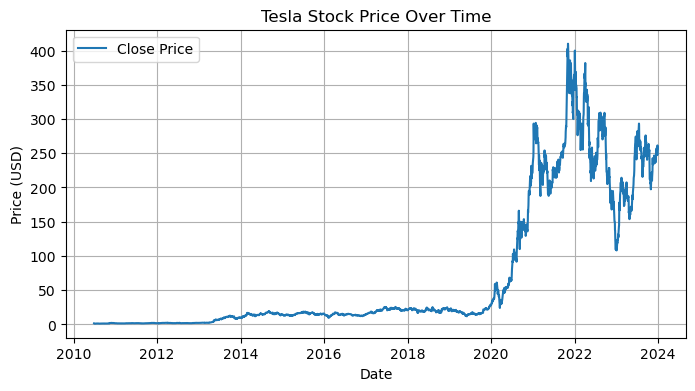

In [55]:
import matplotlib.pyplot as plt
def make_graph(df, title):
    plt.figure(figsize=(8,4))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
make_graph(tesla_data, "Tesla Stock Price Over Time")

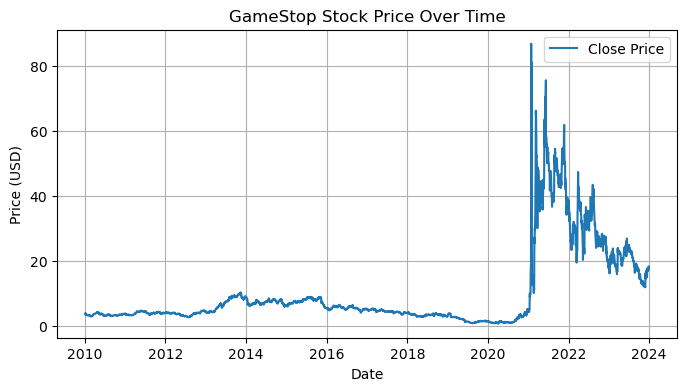

In [59]:
def make_graph(df, title):
    plt.figure(figsize=(8,4))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
make_graph(gme_data, "GameStop Stock Price Over Time")